In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
import pandas as pd
import io
df = pd.read_csv('output.csv')

In [3]:
df.index = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# df.set_index('Date', inplace=True)
df.head()

,Date,Actual Price,ARIMA,RF,LSTM - GS,LSTM - GA
Date,,,,,,
2023-03-28,28/03/2023,27268.13,27433.83075,25960.54085,27573.365,25845.600
2023-03-29,29/03/2023,28348.44,26926.27938,27037.66410,27430.143,25649.092
2023-03-30,30/03/2023,28033.56,26603.26297,27277.88500,27641.266,25757.135
2023-03-31,31/03/2023,28478.48,28319.68856,27410.05570,28084.040,26265.658
2023-04-01,01/04/2023,28411.04,28306.05572,27412.22335,28481.648,26855.305


In [4]:
df.columns

Index(['Date', 'Actual Price', 'ARIMA', 'RF', 'LSTM - GS', 'LSTM - GA'], dtype='object')

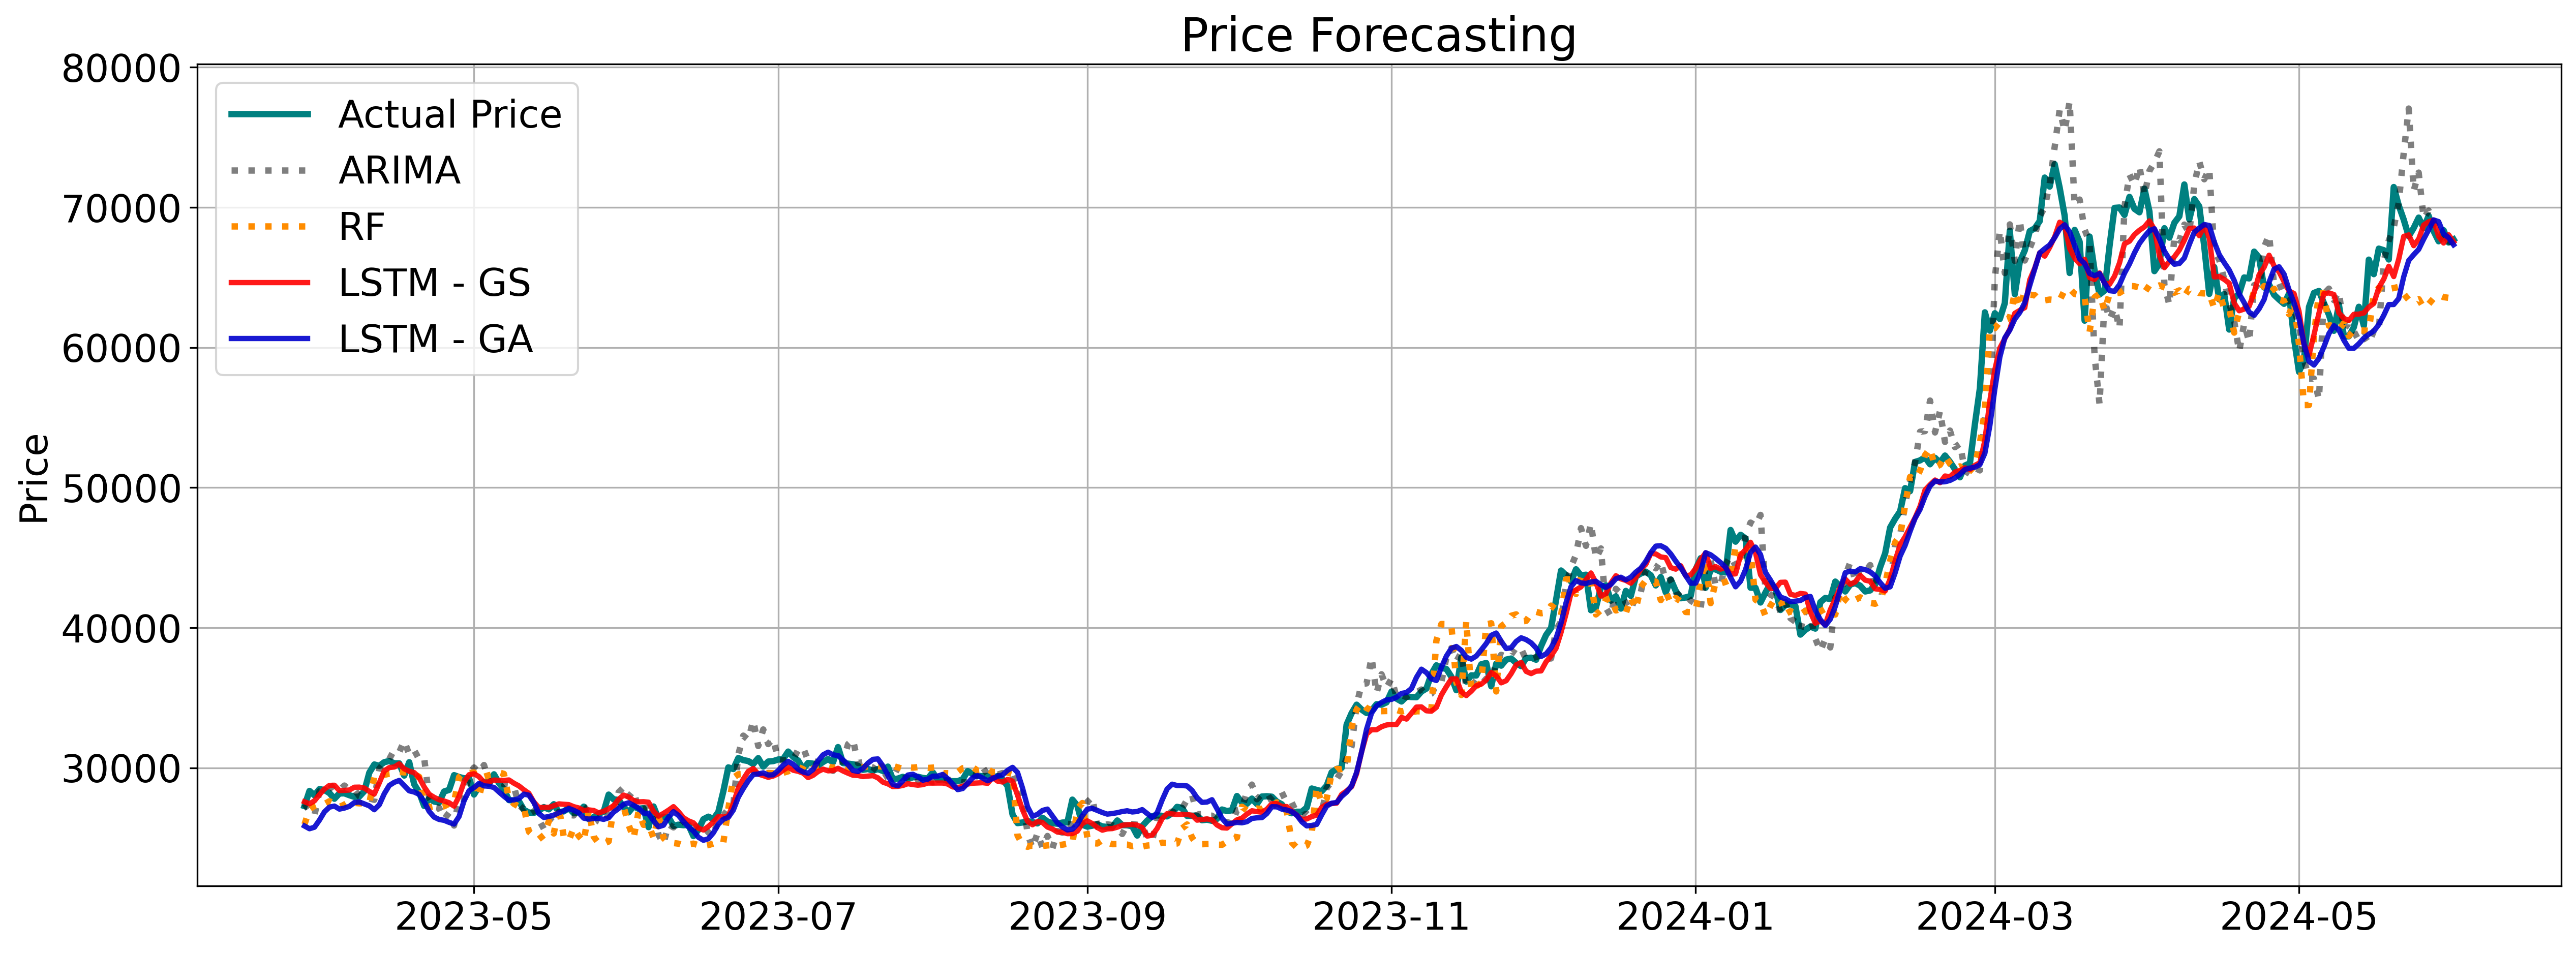

In [5]:
# Plotting
plt.figure(figsize=(20,7), dpi = 300)

# Plot Actual Price as a solid black line
plt.plot(df.index, df['Actual Price'], color='teal', linestyle='-', label='Actual Price', linewidth=3)

# Plot other series as dashed lines with different colors
plt.plot(df.index, df['ARIMA'], color='black', linestyle='dotted', label='ARIMA', alpha = 0.5, linewidth=3)
plt.plot(df.index, df['RF'], color='darkorange', linestyle=':', label='RF', alpha = 1,linewidth=3)
plt.plot(df.index, df['LSTM - GS'], color='red', linestyle='-', label='LSTM - GS', alpha = 0.9, linewidth=2.5)
plt.plot(df.index, df['LSTM - GA'], color='mediumblue', linestyle='-', label='LSTM - GA', alpha = 0.9, linewidth=2.5)

# Adding labels and title
plt.ylabel('Price',fontsize=18)
plt.title('Price Forecasting', fontsize=22)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

# Show plot
plt.show()


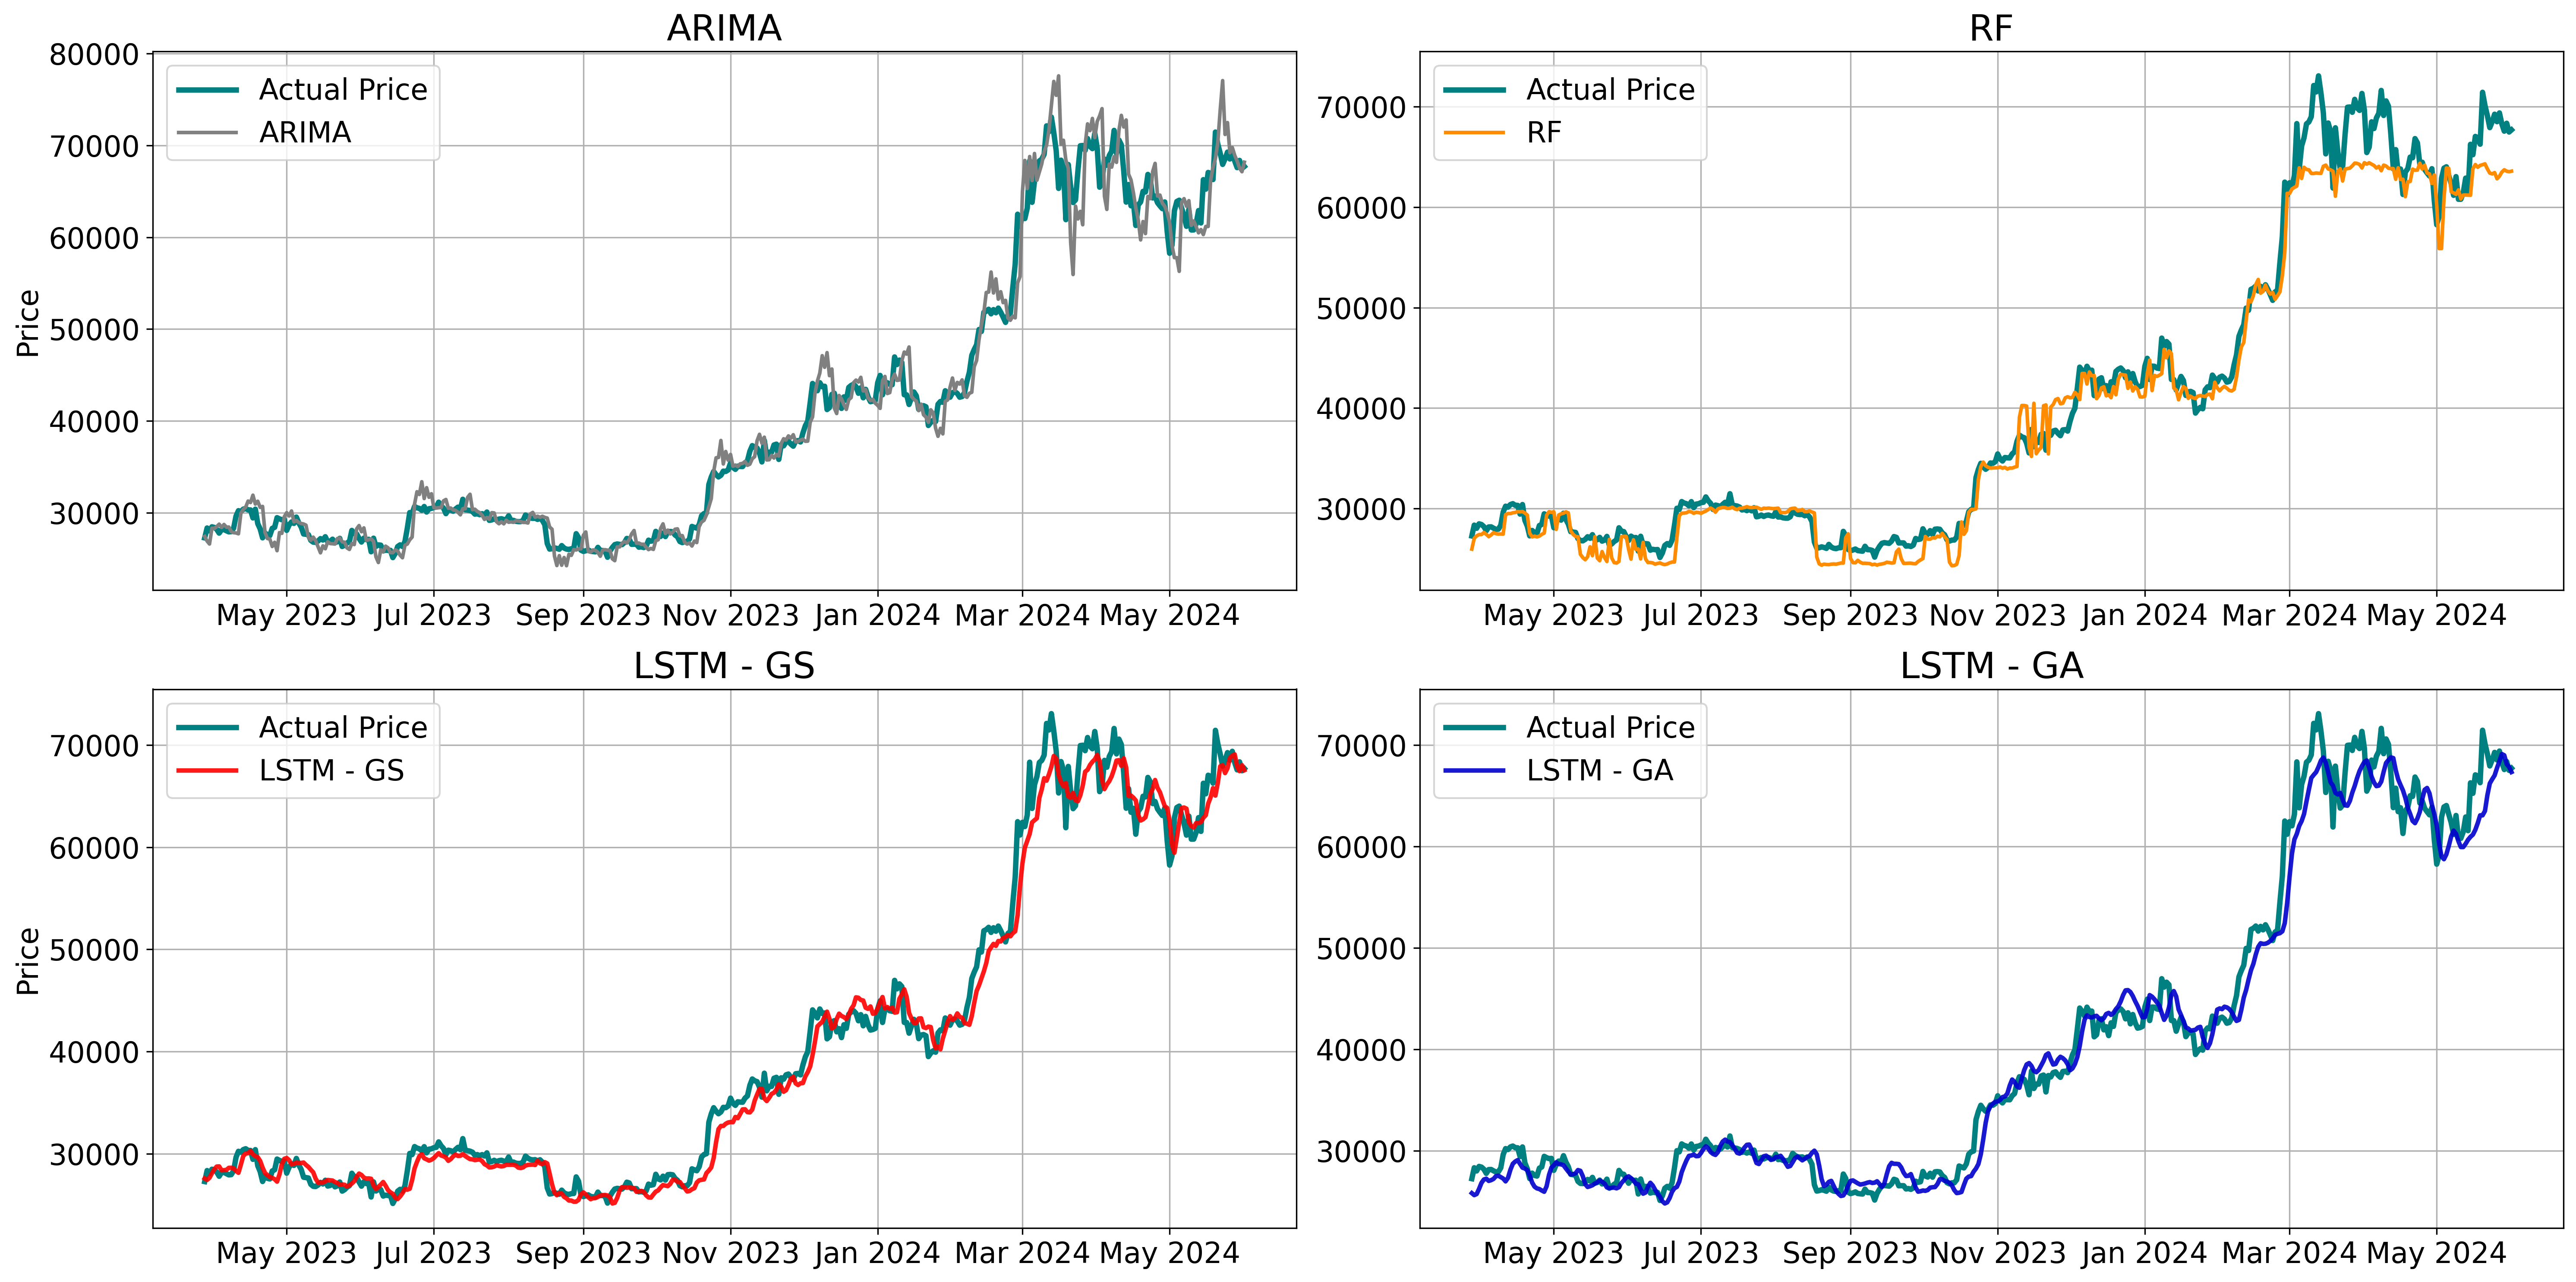

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10), dpi=300)

# Plot Actual Price and ARIMA on the first subplot
axs[0, 0].plot(df.index, df['Actual Price'], color='teal', linestyle='-', label='Actual Price', linewidth=3)
axs[0, 0].plot(df.index, df['ARIMA'], color='grey', linestyle='-', label='ARIMA', alpha=1, linewidth=2)
axs[0, 0].set_title('ARIMA', fontsize=20)
axs[0, 0].set_ylabel('Price', fontsize=16)
axs[0, 0].legend(fontsize=16)
axs[0, 0].grid(True)

# Plot Actual Price and RF on the second subplot
axs[0, 1].plot(df.index, df['Actual Price'], color='teal', linestyle='-', label='Actual Price', linewidth=3)
axs[0, 1].plot(df.index, df['RF'], color='darkorange', linestyle='-', label='RF', alpha=1, linewidth=2)
axs[0, 1].set_title('RF', fontsize=20)
axs[0, 1].legend(fontsize=16)
axs[0, 1].grid(True)

# Plot Actual Price and LSTM - GS on the third subplot
axs[1, 0].plot(df.index, df['Actual Price'], color='teal', linestyle='-', label='Actual Price', linewidth=3)
axs[1, 0].plot(df.index, df['LSTM - GS'], color='red', linestyle='-', label='LSTM - GS', alpha=0.9, linewidth=2.5)
axs[1, 0].set_title('LSTM - GS', fontsize=20)
axs[1, 0].set_ylabel('Price', fontsize=16)
axs[1, 0].legend(fontsize=16)
axs[1, 0].grid(True)

# Plot Actual Price and LSTM - GA on the fourth subplot
axs[1, 1].plot(df.index, df['Actual Price'], color='teal', linestyle='-', label='Actual Price', linewidth=3)
axs[1, 1].plot(df.index, df['LSTM - GA'], color='mediumblue', linestyle='-', label='LSTM - GA', alpha=0.9, linewidth=2.5)
axs[1, 1].set_title('LSTM - GA', fontsize=20)
axs[1, 1].legend(fontsize=16)
axs[1, 1].grid(True)

# Format x-axis with Month-Year
for ax in axs.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)


# Adjust layout to fit labels
plt.tight_layout()

# Show plot
plt.show()


In [7]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#NMSE
def nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

#DA
def DA(y_true, y_pred):
    # Calculate the direction of change
    true_direction = np.sign(np.diff(y_true))
    pred_direction = np.sign(np.diff(y_pred))
    
    # Compare directions
    correct_direction = np.sum(true_direction == pred_direction)
    total_direction = len(true_direction)
    
    # Calculate directional accuracy
    da = correct_direction / total_direction * 100
    
    return da

In [8]:
results = {}
for model in ['ARIMA', 'RF', 'LSTM - GS', 'LSTM - GA']:
    y_true = df['Actual Price'].to_numpy()
    y_pred = df[model].to_numpy()
    rmse_value = rmse(y_true, y_pred)
    mape_value = mape(y_true, y_pred)
    nmse_value = nmse(y_true, y_pred)
    da_value = DA(y_true, y_pred)
    results[model] = {
        'RMSE': rmse_value,
        'MAPE': mape_value,
        'NMSE': nmse_value,
        'DA': da_value
    }
results_df = pd.DataFrame(results)
print(results_df)

            ARIMA           RF    LSTM - GS    LSTM - GA
RMSE  2259.257389  2388.613081  1783.715261  2131.010032
MAPE     3.336230     4.006240     3.037399     3.699890
NMSE     0.021943     0.024528     0.013678     0.019523
DA      48.723898    48.027842    46.867749    48.259861


In [9]:
# results_df.to_csv('metrics.csv')

In [12]:
from entropy_estimators import continuous

X = np.array(df['LSTM - GS'])

analytic = continuous.get_h_mvn(X)
kozachenko = continuous.get_h(X, k=5)

print(f"analytic result: {analytic:.5f}")
print(f"K-L estimator: {kozachenko:.5f}")

analytic result: 11.03093
K-L estimator: 9.98264
